# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_apikey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 

# List of weather Data on each city
weather_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)

#creating counters
record_count,set_count = 1,1

#Looping through cities to make api calls using city as query
for index, city in enumerate(cities):
    
    #Grouping cities
    if record_count == 50:
        set_count += 1
        record_count = 0
    else:
        record_count += 1
    # Create endpoint URL with each city
    queryURL = f"{url}&appid={weather_apikey}&units={units}&q={city}"
    
     # Parse the JSON and retrieve data
   # weatherResponse = requests.get(queryURL).json()
     #print(f"{city_weatherResponse}")
        
     # Run an API request for each of the cities
    try: 
        weatherResponse = requests.get(queryURL).json()  
        # Parse the JSON and retrieve data
    #weatherResponse = requests.get(queryURL).json()
     #print(f"{city_weatherResponse}")
        
       # Parse out the max temp, humidity, and cloudiness
        city = weatherResponse['name']
        city_lat = weatherResponse["coord"]["lat"]
        city_lng = weatherResponse["coord"]["lon"]
        city_maxtemp = weatherResponse["main"]["temp_max"]
        city_humidity = weatherResponse["main"]["humidity"]
        city_cloudiness = weatherResponse["clouds"]["all"]
        city_windspeed = weatherResponse["wind"]["speed"]
        city_country = weatherResponse["sys"]["country"]
        city_date = weatherResponse["dt"]
          
        # Append the City information into city_data list
        weather_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_maxtemp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_cloudiness,
                          "Wind Speed": city_windspeed,
                          "Country": city_country,
                          "Date": city_date
                         })
        print(f"Processing Record {record_count} of Set {set_count} | {city} ")
    except (KeyError, IndexError):
        print(f"City not found. Skipping...")
        
       
        
weather_data_pd = pd.DataFrame(weather_data)

Beginning Data Retrieval
---------------
Processing Record 2 of Set 1 | Huarmey 
Processing Record 3 of Set 1 | Arraial do Cabo 
Processing Record 4 of Set 1 | Saint-Joseph 
Processing Record 5 of Set 1 | Mataura 
Processing Record 6 of Set 1 | Hermanus 
Processing Record 7 of Set 1 | Kruisfontein 
Processing Record 8 of Set 1 | Touros 
Processing Record 9 of Set 1 | Albany 
Processing Record 10 of Set 1 | Ushuaia 
Processing Record 11 of Set 1 | Butaritari 
Processing Record 12 of Set 1 | Ribeira Grande 
Processing Record 13 of Set 1 | Kyaikkami 
Processing Record 14 of Set 1 | Saint Paul Harbor 
Processing Record 15 of Set 1 | Vaini 
Processing Record 16 of Set 1 | Otavi 
Processing Record 17 of Set 1 | Hamilton 
City not found. Skipping...
Processing Record 19 of Set 1 | Florestópolis 
Processing Record 20 of Set 1 | Westport 
Processing Record 21 of Set 1 | Abu Samrah 
City not found. Skipping...
Processing Record 23 of Set 1 | Busselton 
Processing Record 24 of Set 1 | Khatanga 
P

Processing Record 49 of Set 4 | Uglovskoye 
City not found. Skipping...
Processing Record 0 of Set 5 | Nālūt 
Processing Record 1 of Set 5 | Bandundu Province 
Processing Record 2 of Set 5 | La Asuncion 
Processing Record 3 of Set 5 | Kankan 
Processing Record 4 of Set 5 | Saskylakh 
Processing Record 5 of Set 5 | Codrington 
Processing Record 6 of Set 5 | Angoram 
Processing Record 7 of Set 5 | Moyo 
City not found. Skipping...
Processing Record 9 of Set 5 | Meulaboh 
Processing Record 10 of Set 5 | Toamasina 
Processing Record 11 of Set 5 | Mahébourg 
Processing Record 12 of Set 5 | High Level 
Processing Record 13 of Set 5 | Vostok 
Processing Record 14 of Set 5 | Guangyuan 
Processing Record 15 of Set 5 | Bucecea 
Processing Record 16 of Set 5 | Talnakh 
Processing Record 17 of Set 5 | Tuktoyaktuk 
Processing Record 18 of Set 5 | Leer 
Processing Record 19 of Set 5 | Souillac 
Processing Record 20 of Set 5 | Murray Bridge 
Processing Record 21 of Set 5 | Vernon 
Processing Record 2

Processing Record 42 of Set 8 | Ahipara 
Processing Record 43 of Set 8 | Wajima 
Processing Record 44 of Set 8 | Grafton 
Processing Record 45 of Set 8 | Mehamn 
Processing Record 46 of Set 8 | San Jose 
Processing Record 47 of Set 8 | Palāsa 
Processing Record 48 of Set 8 | Teahupoo 
Processing Record 49 of Set 8 | Bambanglipuro 
Processing Record 50 of Set 8 | Talaya 
Processing Record 0 of Set 9 | Pacific Grove 
Processing Record 1 of Set 9 | Jāmtāra 
City not found. Skipping...
Processing Record 3 of Set 9 | Durban 
Processing Record 4 of Set 9 | Harlingen 
Processing Record 5 of Set 9 | Macao 
Processing Record 6 of Set 9 | Agadir 
Processing Record 7 of Set 9 | Jacqueville 
Processing Record 8 of Set 9 | Sipoo 
Processing Record 9 of Set 9 | Sinnamary 
Processing Record 10 of Set 9 | Shebunino 
Processing Record 11 of Set 9 | Broome 
Processing Record 12 of Set 9 | Kavieng 
Processing Record 13 of Set 9 | Yichang 
Processing Record 14 of Set 9 | Gaza 
Processing Record 15 of Set 

Processing Record 34 of Set 12 | Malanville 
Processing Record 35 of Set 12 | Cabo San Lucas 
Processing Record 36 of Set 12 | Saurimo 
Processing Record 37 of Set 12 | Kokopo 
Processing Record 38 of Set 12 | Arrondissement de Mayenne 
Processing Record 39 of Set 12 | Vigrestad 
Processing Record 40 of Set 12 | Yenagoa 
City not found. Skipping...
Processing Record 42 of Set 12 | Barcelos 
City not found. Skipping...
Processing Record 44 of Set 12 | Cabugao 
Processing Record 45 of Set 12 | Cayenne 
Processing Record 46 of Set 12 | Camocim 
Processing Record 47 of Set 12 | Vestmannaeyjar 
Processing Record 48 of Set 12 | Ternate 
Processing Record 49 of Set 12 | Kalmunai 
Processing Record 50 of Set 12 | Oytal 
Processing Record 0 of Set 13 | Gwadar 
Processing Record 1 of Set 13 | Kismayo 
Processing Record 2 of Set 13 | Kattivākkam 
Processing Record 3 of Set 13 | Oranjemund 
Processing Record 4 of Set 13 | Mount Isa 
Processing Record 5 of Set 13 | Shelburne 
Processing Record 6 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
weather_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Huarmey,-10.0681,-78.1522,64.11,79,83,8.57,PE,1666654076
1,Arraial do Cabo,-22.9661,-42.0278,75.06,78,75,6.91,BR,1666653955
2,Saint-Joseph,-21.3667,55.6167,70.18,82,21,4.09,RE,1666654049
3,Mataura,-46.1927,168.8643,52.48,38,1,4.00,NZ,1666653894
4,Hermanus,-34.4187,19.2345,62.80,82,100,7.43,ZA,1666653930


In [30]:
weather_data_pd.describe ()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,18.968205,14.139315,60.399655,73.891192,59.241796,7.629914,1.666654e+09
std,33.504428,87.759039,19.737688,19.716070,39.605541,5.621815,1.356376e+02
min,-54.800000,-179.166700,-10.170000,12.000000,0.000000,0.000000,1.666653e+09
25%,-8.245000,-63.003900,50.365000,63.000000,19.500000,3.440000,1.666654e+09
50%,20.700000,19.875600,65.890000,79.000000,75.000000,6.040000,1.666654e+09
75%,47.416600,82.735450,76.050000,89.000000,99.000000,10.360000,1.666654e+09
max,78.218600,179.316700,88.120000,100.000000,100.000000,40.290000,1.666654e+09


In [31]:
def q25(x):
    return x. quantile(0.25)

def q50(x):
    return x. quantile(0.5)

def q75(x):
    return x. quantile(0.75)

summarydata = weather_data_pd.agg({"Lat":["count","mean","std","min",q25,q50,q75,"max"],
                                  "Lng":["count","mean","std","min",q25,q50,q75,"max"],
                                  "Max Temp":["count","mean","std","min",q25,q50,q75,"max"],
                                  "Humidity":["count","mean","std","min",q25,q50,q75,"max"],
                                  "Cloudiness":["count","mean","std","min",q25,q50,q75,"max"],
                                  "Wind Speed":["count","mean","std","min",q25,q50,q75,"max"],
                                  "Date":["count","mean","std","min",q25,q50,q75,"max"]})
summarydata = summarydata.rename({"q25":"25%","q50":"50%","q75":"75%"})

summarydata

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,18.968205,14.139315,60.399655,73.891192,59.241796,7.629914,1.666654e+09
std,33.504428,87.759039,19.737688,19.716070,39.605541,5.621815,1.356376e+02
min,-54.800000,-179.166700,-10.170000,12.000000,0.000000,0.000000,1.666653e+09
25%,-8.245000,-63.003900,50.365000,63.000000,19.500000,3.440000,1.666654e+09
50%,20.700000,19.875600,65.890000,79.000000,75.000000,6.040000,1.666654e+09
75%,47.416600,82.735450,76.050000,89.000000,99.000000,10.360000,1.666654e+09
max,78.218600,179.316700,88.120000,100.000000,100.000000,40.290000,1.666654e+09


In [32]:
weather_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_maxtemp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_cloudiness,
                          "Wind Speed": city_windspeed,
                          "Country": city_country,
                          "Date": city_date
                         })
weather_data

[{'City': 'Huarmey',
  'Lat': -10.0681,
  'Lng': -78.1522,
  'Max Temp': 64.11,
  'Humidity': 79,
  'Cloudiness': 83,
  'Wind Speed': 8.57,
  'Country': 'PE',
  'Date': 1666654076},
 {'City': 'Arraial do Cabo',
  'Lat': -22.9661,
  'Lng': -42.0278,
  'Max Temp': 75.06,
  'Humidity': 78,
  'Cloudiness': 75,
  'Wind Speed': 6.91,
  'Country': 'BR',
  'Date': 1666653955},
 {'City': 'Saint-Joseph',
  'Lat': -21.3667,
  'Lng': 55.6167,
  'Max Temp': 70.18,
  'Humidity': 82,
  'Cloudiness': 21,
  'Wind Speed': 4.09,
  'Country': 'RE',
  'Date': 1666654049},
 {'City': 'Mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 52.48,
  'Humidity': 38,
  'Cloudiness': 1,
  'Wind Speed': 4,
  'Country': 'NZ',
  'Date': 1666653894},
 {'City': 'Hermanus',
  'Lat': -34.4187,
  'Lng': 19.2345,
  'Max Temp': 62.8,
  'Humidity': 82,
  'Cloudiness': 100,
  'Wind Speed': 7.43,
  'Country': 'ZA',
  'Date': 1666653930},
 {'City': 'Kruisfontein',
  'Lat': -34.0033,
  'Lng': 24.7314,
  'Max Temp': 62.89

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [34]:
highHumidityDF = weather_data_pd[weather_data_pd['Humidity'] > 100]
highHumidityDF


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [35]:
#  Get the indices of cities that have humidity over 100%.
highHumidityDF = highHumidityDF.index

In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data_pd.drop(highHumidityDF, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Huarmey,-10.0681,-78.1522,64.11,79,83,8.57,PE,1666654076
1,Arraial do Cabo,-22.9661,-42.0278,75.06,78,75,6.91,BR,1666653955
2,Saint-Joseph,-21.3667,55.6167,70.18,82,21,4.09,RE,1666654049
3,Mataura,-46.1927,168.8643,52.48,38,1,4.00,NZ,1666653894
4,Hermanus,-34.4187,19.2345,62.80,82,100,7.43,ZA,1666653930
...,...,...,...,...,...,...,...,...,...
574,São João da Barra,-21.6403,-41.0511,75.29,87,56,6.89,BR,1666653900
575,Ust'-Ishim,57.6935,71.1665,32.77,76,100,12.80,RU,1666654272
576,Mariehamn,60.0973,19.9348,46.26,87,100,9.22,AX,1666653987
577,Xining,36.6167,101.7667,45.81,71,100,2.10,CN,1666653906


In [37]:
# Extract relevant fields from the data frame
City_Data = weather_data_pd[["City", "Lat", "Lng", "Max Temp", "Cloudiness", "Wind Speed", "Country", "Humidity", "Date"]]
#City_Data
# Export the City_Data into a csv

City_Data.to_csv("City_Data.csv", index=False)

City_Data.head()

,City,Lat,Lng,Max Temp,Cloudiness,Wind Speed,Country,Humidity,Date
0,Huarmey,-10.0681,-78.1522,64.11,83,8.57,PE,79,1666654076
1,Arraial do Cabo,-22.9661,-42.0278,75.06,75,6.91,BR,78,1666653955
2,Saint-Joseph,-21.3667,55.6167,70.18,21,4.09,RE,82,1666654049
3,Mataura,-46.1927,168.8643,52.48,1,4.00,NZ,38,1666653894
4,Hermanus,-34.4187,19.2345,62.80,100,7.43,ZA,82,1666653930


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

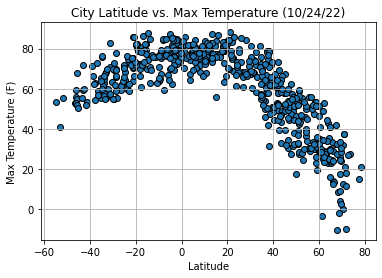

In [39]:
# Build scatter plot for latitude vs temperature
plt.scatter(City_Data["Lat"], 
            City_Data["Max Temp"],
            edgecolor="black", marker="o") 
            
# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Latitude vs. Temperature Plot (F).png")

# Display plot
plt.show()

## Latitude vs Humidity plot

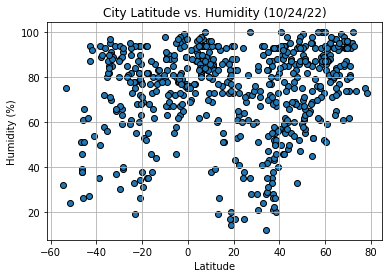

In [40]:
# Build the scatter plots for each city types
plt.scatter(City_Data["Lat"], 
            City_Data["Humidity"],
            edgecolor="black", marker="o")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Latitude vs. Humidity.png")

# Display plot
plt.show()

## Latitude vs. Cloudiness Plot

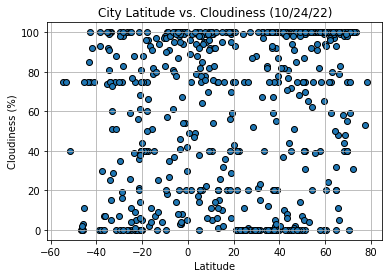

In [44]:
# Build the scatter plots for each city types
plt.scatter(City_Data["Lat"], 
            City_Data["Cloudiness"],
            edgecolor="black", marker="o")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Latitude vs. Cloudiness.png")

# Display plot
plt.show()

## Latitude vs. Wind Speed Plot

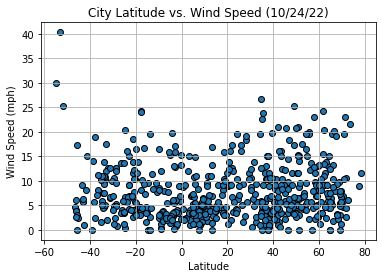

In [45]:
# Build the scatter plots for each city types
plt.scatter(City_Data["Lat"], 
            City_Data["Wind Speed"],
            edgecolor="black", marker="o")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Latitude vs. Wind Speed (MPH) .png")

# Display plot
plt.show()

## Linear Regression

In [46]:
# OPTIONAL: Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values,xytext,filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red",xytext=xytext)
    plt.xlabel("Latitude")
    print(f"The r-value is: {rvalue}")
    plt.savefig(filename)
    plt.show()

In [47]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = weather_data_pd.loc[(weather_data_pd["Lat"] >= 0)]
southern_hemi_df = weather_data_pd.loc[(weather_data_pd["Lat"] <0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8686947048091668


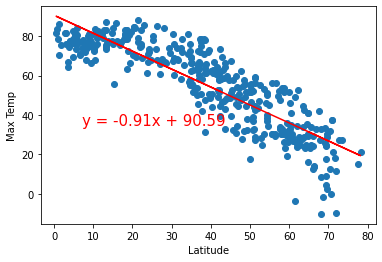

In [48]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
xytext=(7, 35)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Max Temp")

# Save the figure
#plt.savefig("north_hemisphere Lat VS Max Temp .png")

(linear_reg_plot(x_values,y_values,xytext,"north_hemisphere Lat VS Max Temp .png"))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6995595800923118


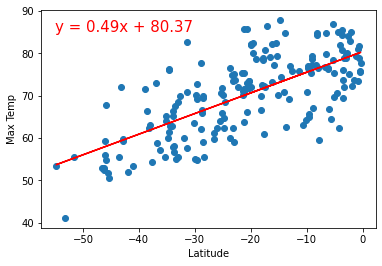

In [49]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
xytext=(-55, 85)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Max Temp")

# Save the figure
#plt.savefig("south_hemisphere Lat VS Max Temp .png")

(linear_reg_plot(x_values,y_values,xytext,"south_hemisphere Lat VS Max Temp .png"))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12439495588591479


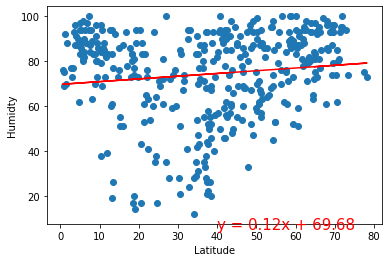

In [50]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
xytext=(40, 5)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Humidty")

# Save the figure
#plt.savefig("north_hemisphere Lat VS Humidity.png")

(linear_reg_plot(x_values,y_values,xytext,"north_hemisphere Lat VS Humidity.png"))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.26742617916956235


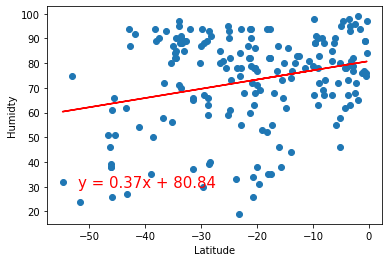

In [51]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
xytext=(-52, 30)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Humidty")

# Save the figure
#plt.savefig("south_hemisphere Lat VS Humidity.png")

(linear_reg_plot(x_values,y_values,xytext,"south_hemisphere Lat VS Humidity.png"))


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.16235259175771607


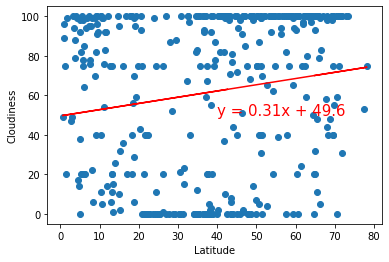

In [52]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
xytext=(40, 50)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Cloudiness")

# Save the figure
#plt.savefig("north_hemisphere Lat VS Cloudiness.png")

(linear_reg_plot(x_values,y_values,xytext,"north_hemisphere Lat VS Cloudiness.png"))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15212036668578727


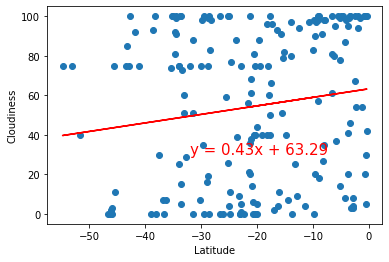

In [53]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
xytext=(-32, 30)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Cloudiness")

# Save the figure
#plt.savefig("south_hemisphere Lat VS Cloudiness.png")

(linear_reg_plot(x_values,y_values,xytext,"south_hemisphere Lat VS Cloudiness.png"))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.20905449218879565


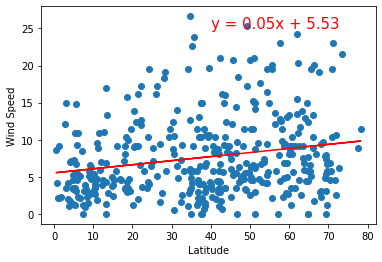

In [54]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
xytext=(40, 25)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Wind Speed")

# Save the figure
#plt.savefig("north_hemisphere Lat VS Wind Speed .png")

(linear_reg_plot(x_values,y_values,xytext,"north_hemisphere Lat VS Wind Speed .png"))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.20790763399378626


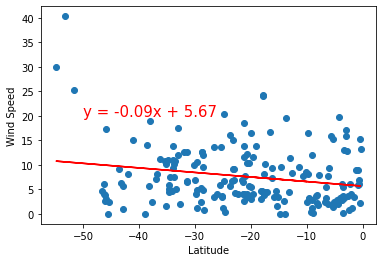

In [55]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
xytext=(-50, 20)
#linear_reg_plot(x_values,y_values,xytext)
plt.ylabel("Wind Speed")

# Save the figure
#plt.savefig("south_hemisphere Lat VS Wind Speed .png")

(linear_reg_plot(x_values,y_values,xytext,"south_hemisphere Lat VS Wind Speed .png"))